<a href="https://colab.research.google.com/github/midleone/DI-Bootcamp/blob/main/week7/day5/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [ ]:
file_path = 'globalterrorismd.csv'

try:
    df = pd.read_csv(file_path)
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')

print(df.head())

In [21]:
print("First few rows of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

First few rows of the dataset:
Empty DataFrame
Columns: [eventid, iyear, imonth, iday, approxdate, extended, resolution, country_txt, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt

In [22]:
missing_values = df.isna().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
eventid       0.0
iyear         0.0
imonth        0.0
iday          0.0
approxdate    0.0
             ... 
INT_LOG       0.0
INT_IDEO      0.0
INT_MISC      0.0
INT_ANY       0.0
related       0.0
Length: 133, dtype: float64


In [11]:
df = df.dropna()

In [44]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index([], dtype='object')


In [49]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   eventid         0 non-null      int64  
 1   iyear           0 non-null      int64  
 2   imonth          0 non-null      int64  
 3   iday            0 non-null      int64  
 4   extended        0 non-null      int64  
 5   latitude        0 non-null      float64
 6   longitude       0 non-null      float64
 7   specificity     0 non-null      float64
 8   vicinity        0 non-null      int64  
 9   crit1           0 non-null      int64  
 10  crit2           0 non-null      int64  
 11  crit3           0 non-null      int64  
 12  doubtterr       0 non-null      float64
 13  alternative     0 non-null      float64
 14  multiple        0 non-null      float64
 15  success         0 non-null      int64  
 16  suicide         0 non-null      int64  
 17  attacktype1     0 non-null      int64  
 18  at

In [45]:

for col in categorical_columns:
    df[col] = df[col].astype('category')
    # One-hot encoding
    df = pd.get_dummies(df, columns=[col])

numerical_columns = df.select_dtypes(exclude=['object', 'category']).columns

scaler = StandardScaler()
print("Dataset Shape after transformation:")
print(df.shape)


Dataset Shape after transformation:
(0, 75)


In [46]:
df.drop(columns=categorical_cols, inplace=True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1310: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


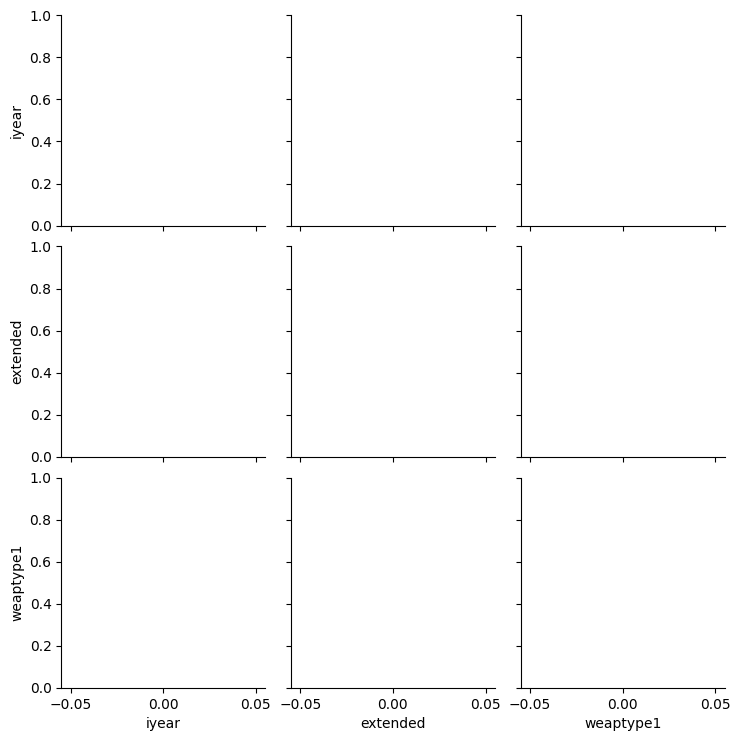

In [54]:
sns.pairplot(df[['iyear', 'extended', 'weaptype1']])
plt.show()

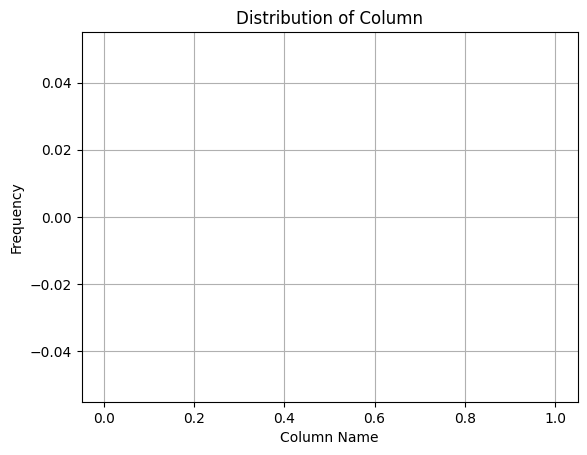

In [55]:
df['weaptype1'].hist(bins=50)
plt.xlabel('Column Name')
plt.ylabel('Frequency')
plt.title('Distribution of Column')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


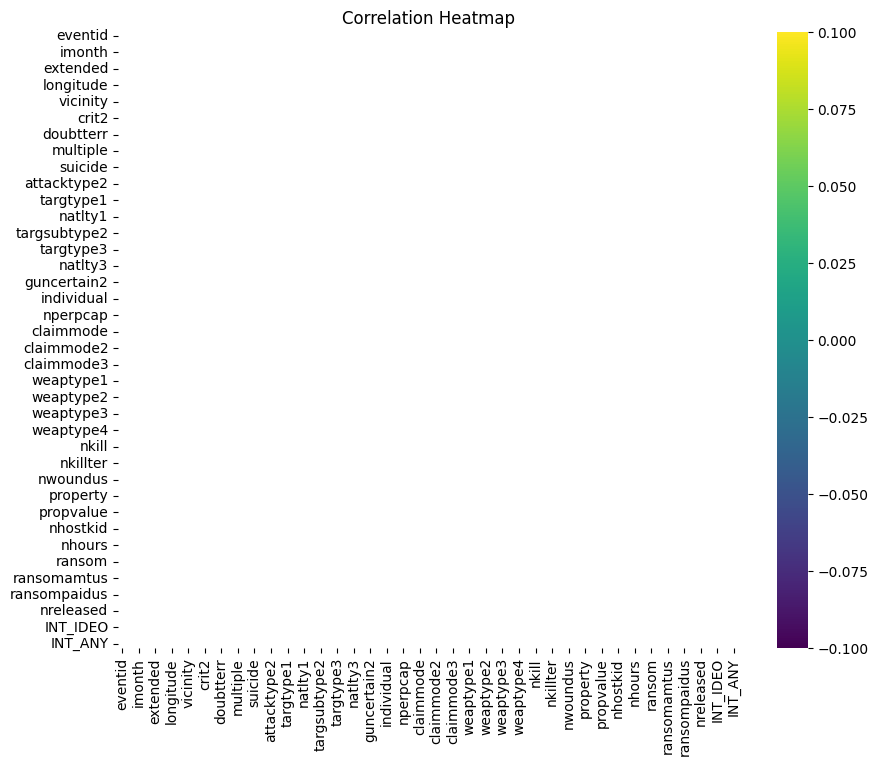

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()